In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import os
from torchvision import models
from util import load_data, model_train, model_test, TransitionLayer, CombinedModel, metrics_plot, ResNetViT
device = torch.device("cuda")
from hyperparameters import(
        PATH,
        save_path,
        learning_rate,
        batch_size,
        num_epochs,
        image_resize,
        num_each_class,
        val_ratio,
        test_ratio)

In [4]:
# Create DataLoaders if needed
train_loader, val_loader, test_loader = load_data(path=PATH, num=num_each_class, val_ratio=val_ratio, test_ratio=test_ratio, batch_size=batch_size, image_resize=image_resize)

Train size: 7500, Val size: 3000, Test size: 4500
Time for loading data: 105.66s


In [4]:
# ResNet50+swin
name = 'Resnet50+swin_t.path'
name = os.path.join(save_path, name)
model_ResNet = models.resnet50(weights='DEFAULT')
# Remove the avgpool and fully connected layer
model_ResNet = torch.nn.Sequential(*list(model_ResNet.children())[:-2])

model_swin = models.swin_t(weights="DEFAULT")

transition_layer = TransitionLayer()

model = CombinedModel(model_ResNet, model_swin, transition_layer)
num_features = model.model_b.head.in_features
model.head = torch.nn.Linear(num_features, 10)



# Define loss function
criterion = torch.nn.CrossEntropyLoss()
criterion = criterion.to(device)
# Define optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# accs, losses = model_train(model, optimizer, criterion, device, train_loader, val_loader, num_epochs)

# Save the state dictionary of the model
# torch.save(model.state_dict(), name)

# load model
model.load_state_dict(torch.load(name))
pred, true = model_test(model, criterion, device, test_loader)

100%|██████████| 282/282 [00:34<00:00,  8.10it/s]

Precision: 0.9591, Recall: 0.9589
Test Loss: 0.1825, Test Acc: 95.92


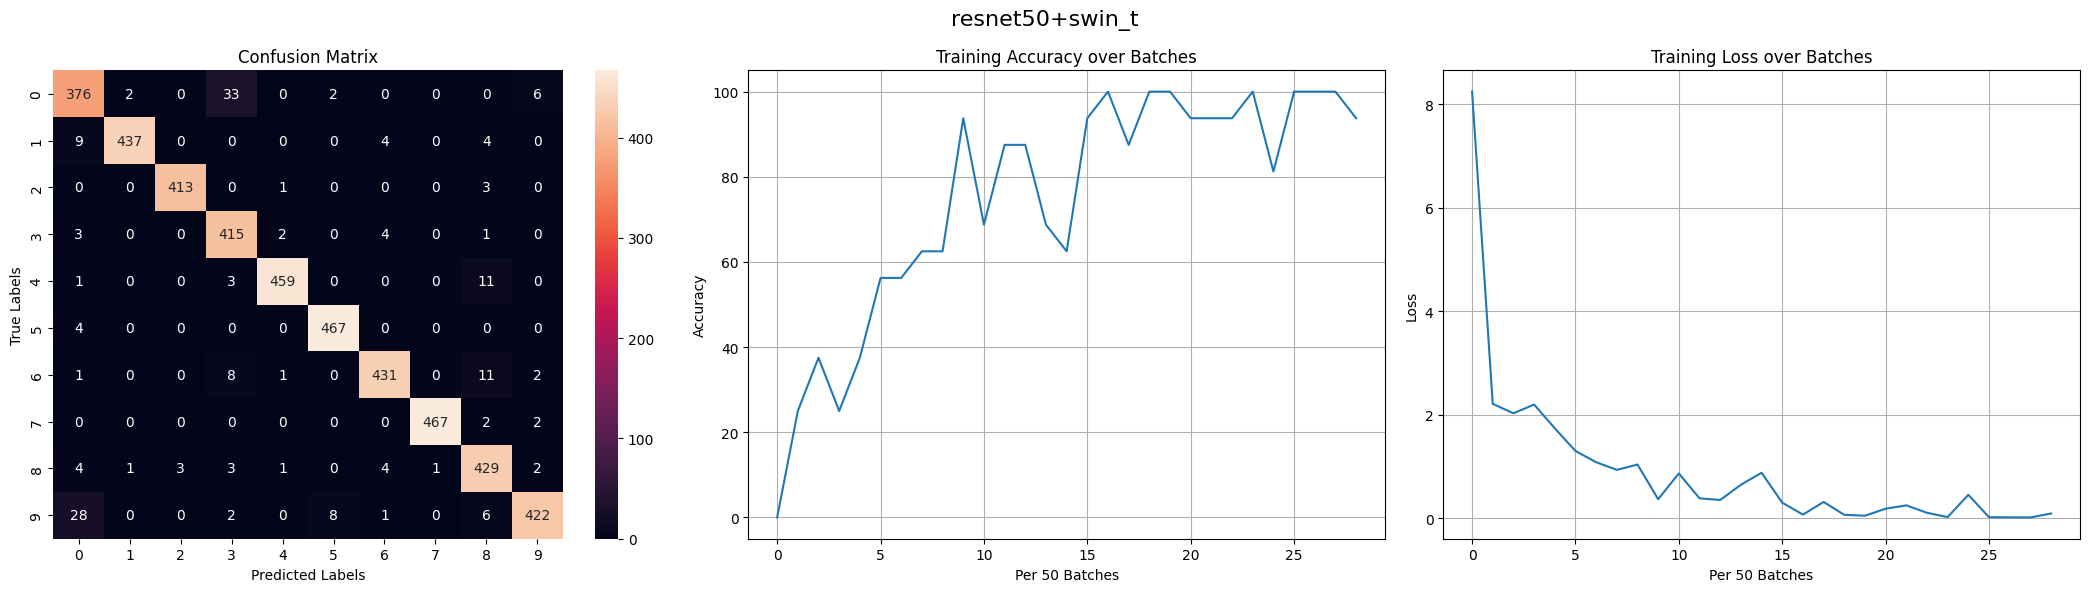

In [5]:
# metrics_plot(pred, true, accs, losses, 50, 'resnet50+swin_t')

In [5]:
# ResNet50+swin
name = 'Resnet50+vit.path'
name = os.path.join(save_path, name)

model = ResNetViT(num_classes=10)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()
criterion = criterion.to(device)
# Define optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# accs, losses = model_train(model, optimizer, criterion, device, train_loader, val_loader, num_epochs)
# Save the state dictionary of the model
# torch.save(model.state_dict(), name)

# load model
model.load_state_dict(torch.load(name))
pred, true = model_test(model, criterion, device, test_loader)

100%|██████████| 282/282 [00:38<00:00,  7.41it/s]

Precision: 0.9817, Recall: 0.9797
Test Loss: 0.0727, Test Acc: 98.03


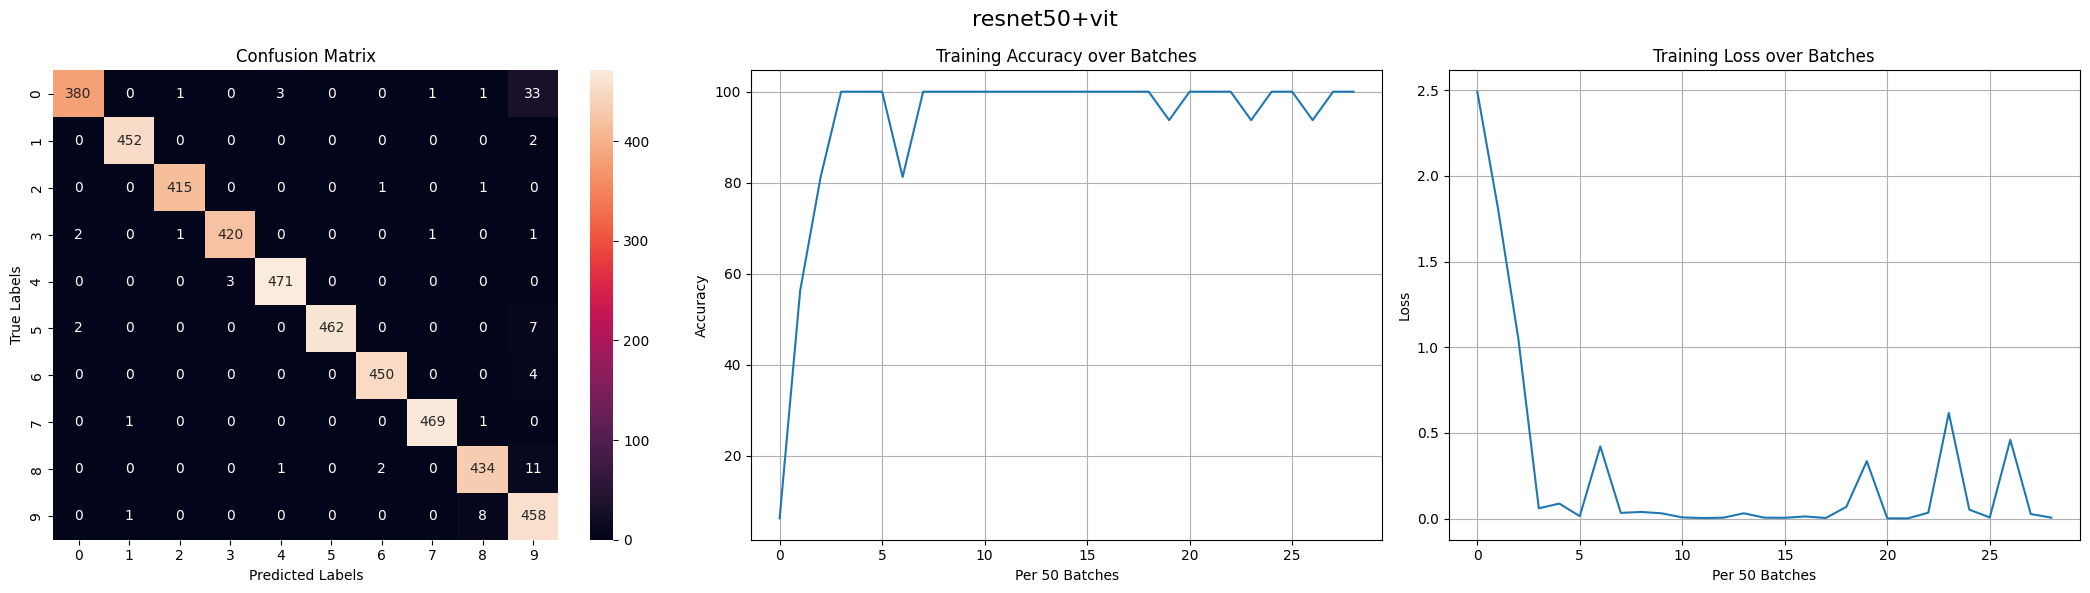

In [7]:
# metrics_plot(pred, true, accs, losses, 50, 'resnet50+vit')